In [61]:
import pandas as pd
import numpy as np
from icecream import ic
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Import

In [62]:
df = pd.read_csv("data/crit_regression.txt", sep="\t")
display(df)
df.shape # (13,4)
df.columns # Index(['Crit Chance', 'Legendary', 'Fabled', 'Mythical'], dtype='object')

,Crit Chance,Legendary,Fabled,Mythical
0,946,6.2,1.9,0.10
1,1094,6.0,1.5,0.10
2,1094,6.3,2.1,0.20
3,1111,6.5,1.9,0.20
4,1111,6.2,2.8,0.30
5,1222,6.3,2.5,0.20
6,1270,6.5,2.7,0.30
7,1270,6.7,2.6,0.40
8,1386,6.5,2.9,0.40
9,1568,7.0,2.9,0.40


Index(['Crit Chance', 'Legendary', 'Fabled', 'Mythical'], dtype='object')

In [63]:
# normalize(df[['Legendary','Fabled', 'Mythical']], axis=0)
X = df["Crit Chance"].values.reshape(-1, 1)
Y = df[["Legendary","Fabled","Mythical"]]



reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.8543687129531817

In [64]:
# Define the models to test
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    # SVR(),
    RandomForestRegressor(),
    # GradientBoostingRegressor(),
    MLPRegressor()
]

# Evaluate the models using cross-validation
for model in models:
    scores = cross_val_score(model, X, Y, cv=5, scoring="r2")
    print(f"{model.__class__.__name__}: R^2 = {scores.mean():.3f} (+/- {scores.std():.3f})")

LinearRegression: R^2 = -156013621102735052384124272640.000 (+/- 312027242205470104768248545280.000)
Ridge: R^2 = -156013752001938761790133370880.000 (+/- 312027504003877558764638830592.000)
Lasso: R^2 = -161194862454736244804029513728.000 (+/- 322389724909472489608059027456.000)
ElasticNet: R^2 = -158581334677484737122747285504.000 (+/- 317162669354969474245494571008.000)
RandomForestRegressor: R^2 = -204064528143856384976128835584.000 (+/- 408129056287712769952257671168.000)
MLPRegressor: R^2 = -567901060338929935410529245855744.000 (+/- 1135802120677859870821058491711488.000)


In [65]:
# Print the coefficients
print("Coefficients:", reg.coef_)

Coefficients: [[0.0034985 ]
 [0.00198134]
 [0.0003527 ]]


In [66]:
x_new = 2000
y_pred = reg.predict([[x_new]])
normal_crits = 100-y_pred.sum()
y_pred=np.insert(y_pred,0,values=normal_crits)
display(y_pred)
weights = np.array([1, 1.25, 1.65, 2])
result = np.dot(y_pred / 100, weights)
display(result)

test_x, test_y = 1568, np.array([6.9,.9,0.4])
normal_crits = 100-test_y.sum()
test_y=np.insert(test_y,0,values=normal_crits)
result = np.dot(test_y / 100, weights)

array([86.60891724,  8.93438792,  3.90327841,  0.55341644])

1.0532414438270215

In [67]:
def enhanced_crit_modified(input_model,input_x):
    y_pred = input_model.predict([[input_x]])
    normal_crits = 100-y_pred.sum()
    y_pred=np.insert(y_pred,0,values=normal_crits)
    ic(y_pred)
    weights = np.array([1.00, 1.25, 1.65, 2])
    test_result = np.array([x*y for x,y in zip(weights,y_pred)])
    
    # display(test_result.sum())
    result = np.dot(y_pred / 100, weights)
    ic(f"(N,L,F,M) crits: {weights} • {test_result} = {result}")
    # display(result)
    return result

ic(enhanced_crit_modified(reg,500))

ic| y_pred: array([9.53577297e+01, 3.68663083e+00, 9.31274828e-01, 2.43646240e-02])
ic| f"(N,L,F,M) crits: {weights} • {test_result} = {result}": ('(N,L,F,M) crits: [1.   1.25 1.65 2.  ] • [9.53577297e+01 4.60828854e+00 '
                                                               '1.53660347e+00 4.87292481e-02] = 1.015513509708762')
ic| enhanced_crit_modified(reg,500): 1.015513509708762


1.015513509708762

ic| y_pred: array([9.53577297e+01, 3.68663083e+00, 9.31274828e-01, 2.43646240e-02])
ic| f"(N,L,F,M) crits: {weights} • {test_result} = {result}": ('(N,L,F,M) crits: [1.   1.25 1.65 2.  ] • [9.53577297e+01 4.60828854e+00 '
                                                               '1.53660347e+00 4.87292481e-02] = 1.015513509708762')
ic| y_pred: array([9.47030567e+01, 4.07932014e+00, 1.15366965e+00, 6.39535354e-02])
ic| f"(N,L,F,M) crits: {weights} • {test_result} = {result}": ('(N,L,F,M) crits: [1.   1.25 1.65 2.  ] • [94.70305667  5.09915017  '
                                                               '1.90355493  0.12790707] = 1.0183366884523053')
ic| y_pred: array([94.04838363,  4.47200945,  1.37606448,  0.10354245])
ic| f"(N,L,F,M) crits: {weights} • {test_result} = {result}": ('(N,L,F,M) crits: [1.   1.25 1.65 2.  ] • [94.04838363  5.59001181  '
                                                               '2.27050639  0.20708489] = 1.0211598671958484')
ic| y_pred: array

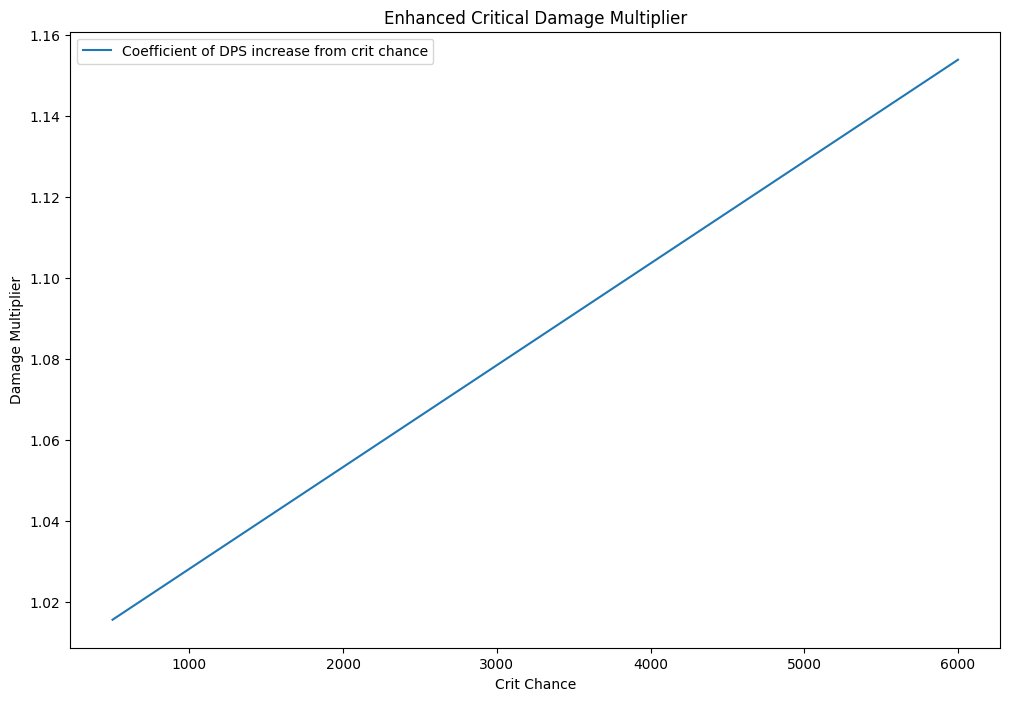

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(func, x_range, title="Function Plot", xlabel="x", ylabel="y", y_limits=None, figsize=(12, 8), label=None, logarithmic=False):
    """
    Plots a given function in a specified x range.
    
    Args:
        func (function): The function to be plotted.
        x_range (tuple): The range of x values (start, end, num_points).
        title (str, optional): The title of the plot. Defaults to "Function Plot".
        xlabel (str, optional): The x-axis label. Defaults to "x".
        ylabel (str, optional): The y-axis label. Defaults to "y".
        y_limits (tuple, optional): The y-axis limits (min, max). Defaults to None.
        figsize (tuple, optional): The size of the figure. Defaults to (12, 8).
        label (str, optional): The label for the function curve. Defaults to None.
    """
    
    # Generate a range of x values
    x_values = np.linspace(x_range[0], x_range[1], x_range[2])

    # Calculate the corresponding y values using the function
    y_values = np.array([func(x) for x in x_values])

    # Create the plot
    plt.figure(figsize=figsize)
    plt.plot(x_values, y_values, label=label or f"y = {func.__name__}(x)")

    # Set the y-axis limits if specified
    if y_limits:
        plt.ylim(y_limits)

    # Set plot title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    if logarithmic:
        print("Log on")
        plt.yscale('log')
    # Show the plot
    plt.show()

# Define the function to graph
my_function = lambda x: enhanced_crit_modified(reg,x)

# Use the plot_function function to plot my_function
plot_function(my_function, x_range=(500, 6000, 50), title="Enhanced Critical Damage Multiplier", y_limits=False, logarithmic=False, xlabel="Crit Chance", ylabel="Damage Multiplier", label="Coefficient of DPS increase from crit chance")


In [69]:




x_new = 5000
y_pred = reg.predict([[x_new]])
weights = np.array([1.25, 1.65, 2])
result = np.dot(y_pred / 100, weights)

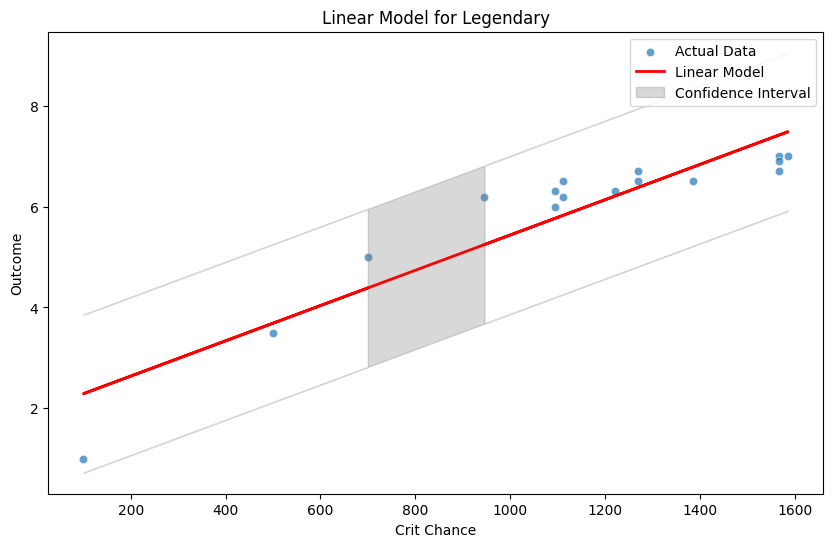

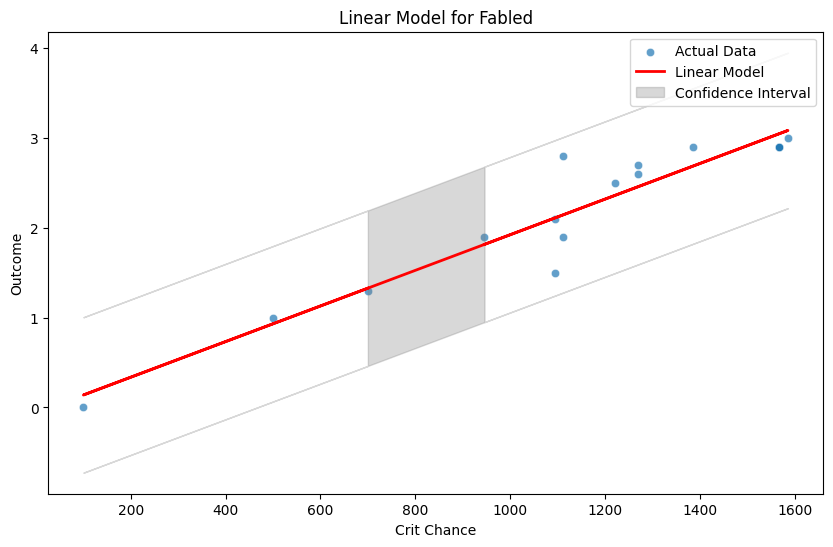

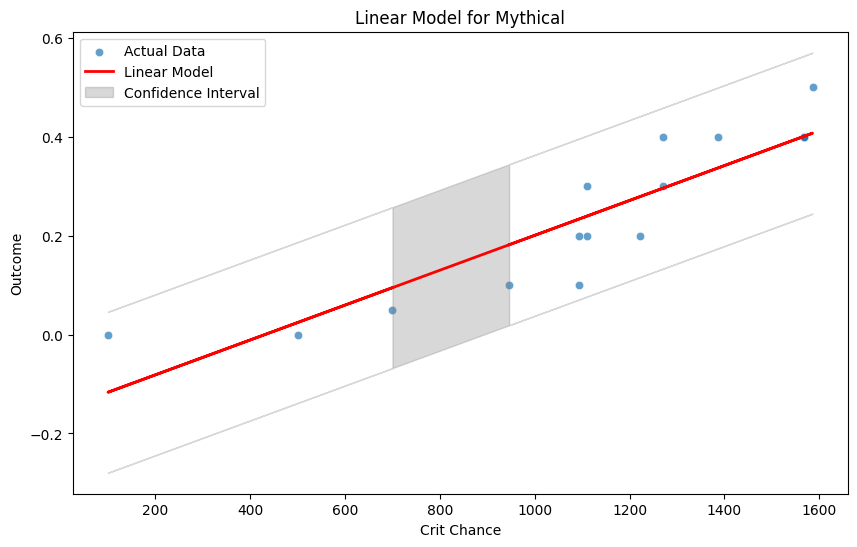

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_linear_model(X, Y, model, title="Linear Model"):
    # Train the model
    model.fit(X, Y)
    
    # Generate predictions and confidence interval
    y_pred = model.predict(X)
    y_std = Y.std()
    y_upper = y_pred + y_std
    y_lower = y_pred - y_std

    # Create a scatter plot of the actual data
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.ravel(), y=Y, alpha=0.7, label="Actual Data")

    # Plot the linear model
    plt.plot(X, y_pred, color='red', linewidth=2, label="Linear Model")

    # Plot the confidence interval
    plt.fill_between(X.ravel(), y_lower.ravel(), y_upper.ravel(), color='gray', alpha=0.3, label="Confidence Interval")

    # Set plot title and labels
    plt.title(title)
    plt.xlabel("Crit Chance")
    plt.ylabel("Outcome")
    plt.legend()

    # Show the plot
    plt.show()

# Use the defined function to create a visual for each outcome
outcomes = ["Legendary", "Fabled", "Mythical"]

for outcome in outcomes:
    y = df[outcome]
    plot_linear_model(X, y, LinearRegression(), title=f"Linear Model for {outcome}")


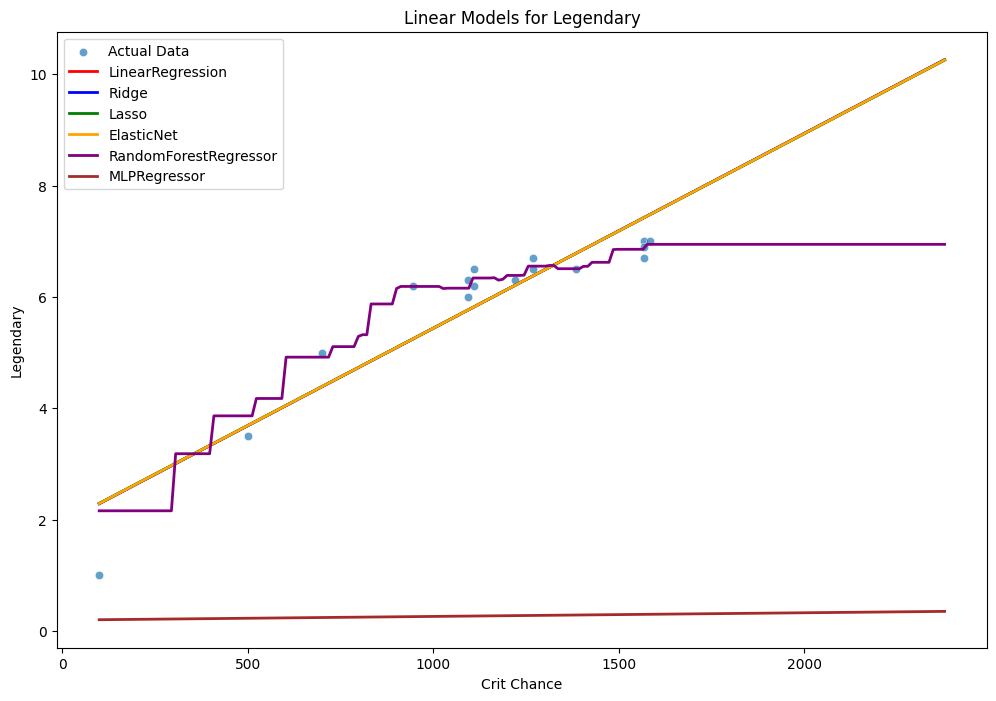

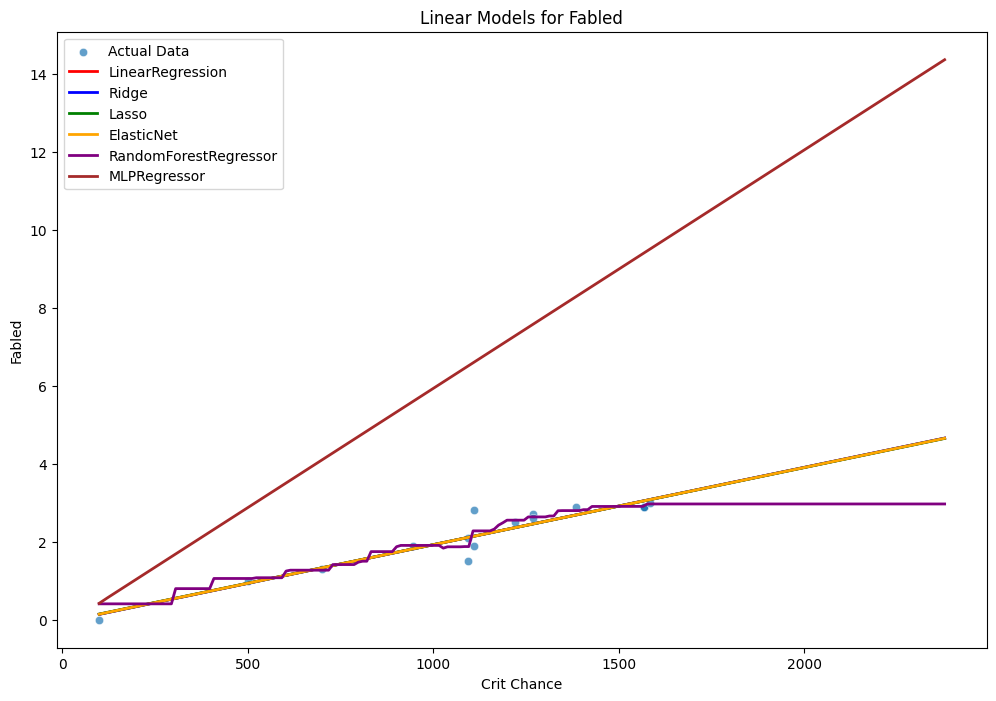

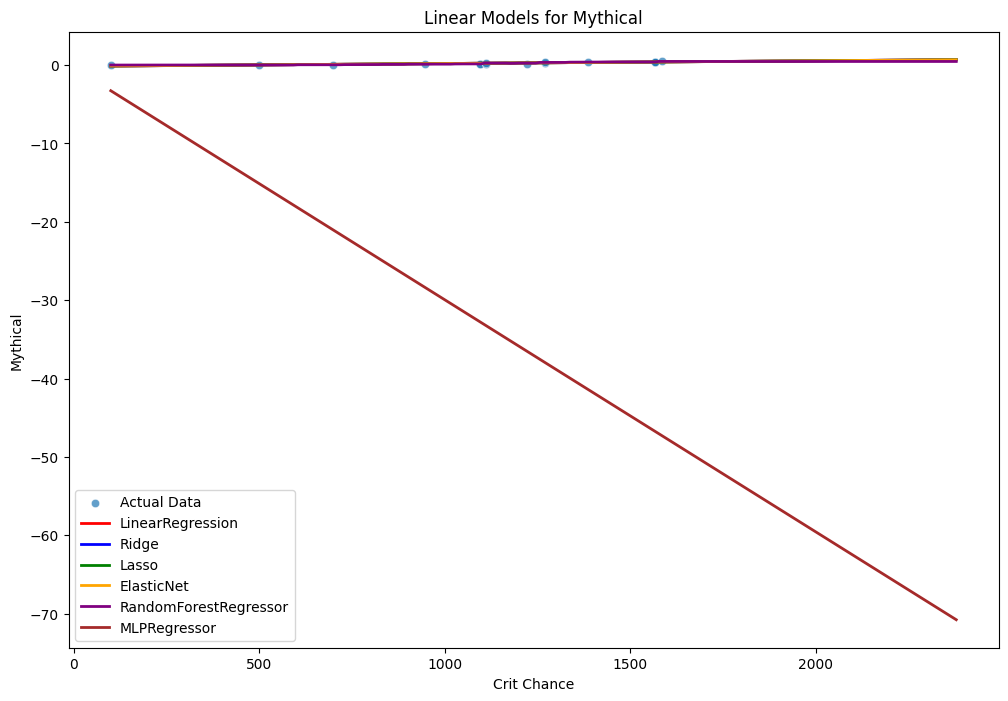

In [71]:
def plot_linear_models(X, Y, models, colors, title="Linear Models", xlabel="No label", ylabel="No label"):
    plt.figure(figsize=(12, 8))

    # Create a scatter plot of the actual data
    sns.scatterplot(x=X.ravel(), y=Y, alpha=0.7, label="Actual Data")

    # Generate new X values for prediction beyond the dataset
    X_new = np.linspace(X.min(), X.max() * 1.5, 200).reshape(-1, 1)

    # Train each model and plot it
    for model, color in zip(models, colors):
        model.fit(X, Y)
        y_pred = model.predict(X_new)

        plt.plot(X_new, y_pred, linewidth=2, color=color, label=f"{model.__class__.__name__}")

    # Set plot title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    # Show the plot
    plt.show()

# Define the models and their colors
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(),
    MLPRegressor()
]

colors = ["red", "blue", "green", "orange", "purple", "brown"]

# Use the defined function to create a visual for each outcome
outcomes = ["Legendary", "Fabled", "Mythical"]

for outcome in outcomes:
    y = df[outcome]
    plot_linear_models(X, y, models, colors, title=f"Linear Models for {outcome}", xlabel="Crit Chance", ylabel=outcome)


,Crit Chance,Legendary,Fabled,Mythical,Normal
0,946,6.2,1.9,0.10,91.80
1,1094,6.0,1.5,0.10,92.40
2,1094,6.3,2.1,0.20,91.40
3,1111,6.5,1.9,0.20,91.40
4,1111,6.2,2.8,0.30,90.70
5,1222,6.3,2.5,0.20,91.00
6,1270,6.5,2.7,0.30,90.50
7,1270,6.7,2.6,0.40,90.30
8,1386,6.5,2.9,0.40,90.20
9,1568,7.0,2.9,0.40,89.70


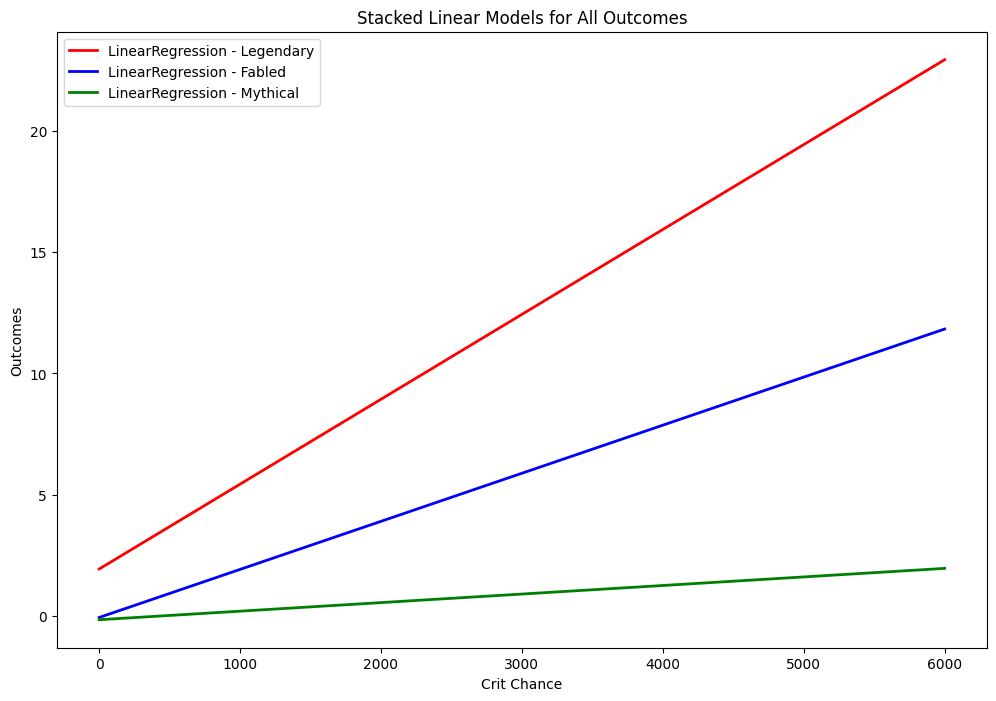

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stacked_linear_models(X, Y_list, Y_names, models, colors, title="Stacked Linear Models", xlabel="Crit Chance", ylabel="Outcomes", log_scale=False):
    plt.figure(figsize=(12, 8))

    # Generate new X values for prediction beyond the dataset
    X_new = np.linspace(0, 6000, 200).reshape(-1, 1)

    # Train each model and plot it
    for model in models:
        for Y, Y_name, color in zip(Y_list, Y_names, colors):
            model.fit(X, Y)
            y_pred = model.predict(X_new)
            # display(y_pred)
            plt.plot(X_new, y_pred, linewidth=2, color=color, label=f"{model.__class__.__name__} - {Y_name}")

    # Set plot title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    if log_scale:
        plt.yscale("log")
    # Show the plot
    plt.show()



# Define the models and their colors
models = [
    LinearRegression(),
    # Ridge(),
    # Lasso(),
    # ElasticNet(),
    # RandomForestRegressor(),
    # MLPRegressor()
]

colors = ["red", "blue", "green", "orange", "purple", "brown"]

# Use the defined function to create a visual for all outcomes
temp_df = df

#Add Normal crit column
# temp_df['Normal'] = df.apply(lambda row : sum(row['Legendary'],
#                      row['Fabled'], row['Mythical']), axis = 1)
temp_df['Normal']=temp_df.apply(lambda x: 100-sum(x[['Legendary','Fabled','Mythical']]), axis=1)
display(temp_df)
outcomes = ["Legendary", "Fabled", "Mythical"]
Y_list = [temp_df[outcome] for outcome in outcomes]
# Y_list.append(
#     [[outcome] for column in Y_list]
# )
# display(Y_list)
plot_stacked_linear_models(X, Y_list, outcomes, models, colors, title="Stacked Linear Models for All Outcomes", xlabel="Crit Chance", ylabel="Outcomes", log_scale=False)


### Attempting interactive graphs. WIP

In [79]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, Legend, LegendItem

output_notebook()

def plot_stacked_linear_models_bokeh(X, Y_list, Y_names, models, colors, title="Stacked Linear Models", xlabel="Crit Chance", ylabel="Outcomes", log_scale=False):
    # Generate new X values for prediction beyond the dataset
    X_new = np.linspace(0, 6000, 200).reshape(-1, 1)

    # Create an empty list to store traces
    traces = []

    # Train each model and add the traces to the list
    for model in models:
        for Y, Y_name, color in zip(Y_list, Y_names, colors):
            model.fit(X, Y)
            y_pred = model.predict(X_new)
            trace = {"x": X_new.reshape(-1), "y": y_pred.reshape(-1), "name": f"{model.__class__.__name__} - {Y_name}", "color": color}
            traces.append(trace)

    # Create the figure
    p = figure(title=title, x_axis_label=xlabel, y_axis_label=ylabel, width=800, height=400)

    # Add traces to the figure
    for trace in traces:
        r = p.line(x=trace["x"], y=trace["y"], line_color=trace["color"], legend_label=trace["name"], muted_color=trace["color"], muted_alpha=0.2)

    # Set plot title and labels
    p.legend.location = "top_left"
    p.legend.click_policy="mute"

    # Show the plot
    show(p)

# Define the models and their colors
models = [
    LinearRegression(),
]

colors = ["orangered","purple", "red", "blue", "green", "orange", "purple", "brown"]

# Use the defined function to create a visual for all outcomes
temp_df = df

# Add Normal crit column
temp_df['Normal'] = temp_df.apply(lambda x: 100 - sum(x[['Legendary', 'Fabled', 'Mythical']]), axis=1)
outcomes = ["Legendary", "Fabled", "Mythical"]
Y_list = [temp_df[outcome] for outcome in outcomes]

plot_stacked_linear_models_bokeh(X, Y_list, outcomes, models, colors, title="Stacked Linear Models for All Outcomes", xlabel="Crit Chance", ylabel="Outcomes", log_scale=False)


Loading BokehJS ...

In [74]:
import plotly.offline as pyo
import plotly.graph_objs as go

def plot_stacked_linear_models(X, Y_list, Y_names, models, colors, title="Stacked Linear Models", xlabel="Crit Chance", ylabel="Outcomes", log_scale=False):
    # Generate new X values for prediction beyond the dataset
    X_new = np.linspace(0, 6000, 200).reshape(-1, 1)

    # Create an empty list to store traces
    traces = []

    # Train each model and add the traces to the list
    for model in models:
        for Y, Y_name, color in zip(Y_list, Y_names, colors):
            model.fit(X, Y)
            y_pred = model.predict(X_new)
            trace = go.Scatter(x=X_new.reshape(-1), y=y_pred.reshape(-1), mode="lines", name=f"{model.__class__.__name__} - {Y_name}", line=dict(color=color))
            traces.append(trace)

    # Set plot title and labels
    layout = go.Layout(
        title=title,
        xaxis=dict(title=xlabel),
        yaxis=dict(title=ylabel, type="log" if log_scale else "linear"),
        hovermode="closest"
    )

    # Create the figure with traces and layout
    fig = go.Figure(data=traces, layout=layout)

    # Show the plot
    fig.show()
    
    # Show the plot
    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

# Define the models and their colors
models = [
    LinearRegression(),
]

colors = ["red", "blue", "green", "orange", "purple", "brown"]

# Use the defined function to create a visual for all outcomes
temp_df = df

# Add Normal crit column
temp_df['Normal'] = temp_df.apply(lambda x: 100 - sum(x[['Legendary', 'Fabled', 'Mythical']]), axis=1)
outcomes = ["Legendary", "Fabled", "Mythical"]
Y_list = [temp_df[outcome] for outcome in outcomes]

plot_stacked_linear_models(X, Y_list, outcomes, models, colors, title="Stacked Linear Models for All Outcomes", xlabel="Crit Chance", ylabel="Outcomes", log_scale=False)
